<a href="https://colab.research.google.com/github/Hassaan-khalid/Mall_Customer-Dataset/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [6]:
#loading data
df = pd.read_csv("/content/Mall_Customers.csv")
print("There are {} rows and {} columns in dataset".format(df.shape[0],df.shape[1]))

There are 200 rows and 5 columns in dataset


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#statistical summary of all the numerical variables in dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#check null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Exploratory Data Analysis

In [11]:
male_age = df[df['Gender']=='Male']['Age']
female_age = df[df['Gender']=='Female']['Age']
age_bins = range(15,75,5)

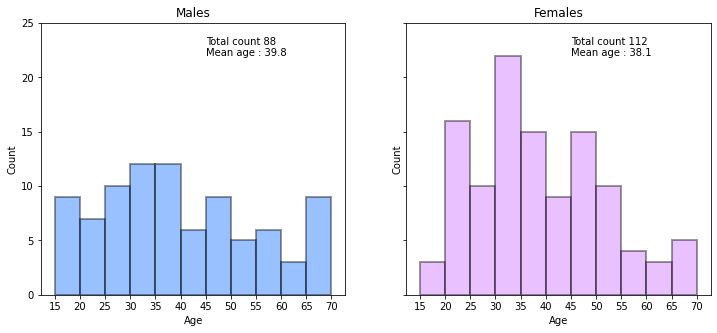

In [12]:
#males histogram
fig2,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(male_age,bins=age_bins,kde=False,color='#0066ff',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))

ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45,23,"Total count {}".format(male_age.count()))
ax1.text(45,22,"Mean age : {:.1f}".format(male_age.mean()))

#females histogram
sns.distplot(female_age,bins=age_bins,kde=False,color='#cc66ff',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))

ax2.set_xticks(age_bins)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45,23,"Total count {}".format(female_age.count()))
ax2.text(45,22,"Mean age : {:.1f}".format(female_age.mean()))

plt.show()

In [13]:
#Gender
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [14]:
#company's campaingn ids' composition
import plotly.express as px

ge = df['Gender'].value_counts()
ge_df = pd.DataFrame({'labels': ge.index,'values': ge.values})
px.pie(ge_df, names ='labels', values='values', title='Gender Composition', hole = 0.35)

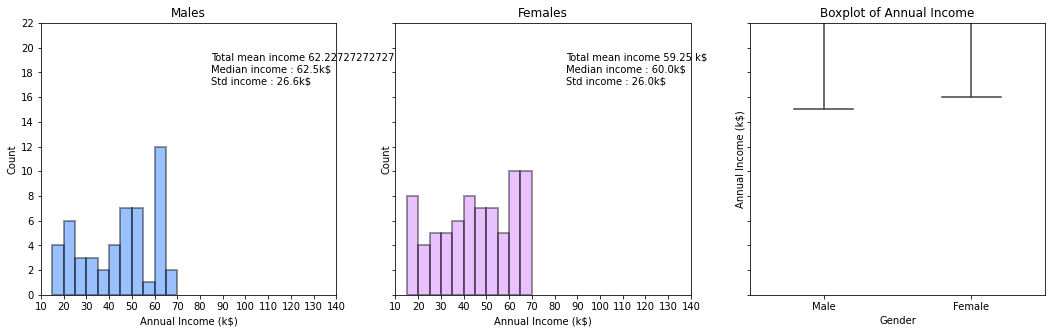

In [15]:
males_income = df[df['Gender']=='Male']['Annual Income (k$)'] #subsets with males income
females_income = df[df['Gender']=='Female']['Annual Income (k$)'] #subsets with Females income
my_bins = range(10,150,10)

#males histogram
fig2,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5),sharey=True)
sns.distplot(males_income,bins=age_bins,kde=False,color='#0066ff',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))

ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85,19,"Total mean income {} k$".format(males_income.mean()))
ax1.text(85,18,"Median income : {:.1f}k$".format(males_income.median()))
ax1.text(85,17,"Std income : {:.1f}k$".format(males_income.std()))

#Females histogram
sns.distplot(females_income,bins=age_bins,kde=False,color='#cc66ff',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))

ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(85,19,"Total mean income {} k$".format(females_income.mean()))
ax2.text(85,18,"Median income : {:.1f}k$".format(females_income.median()))
ax2.text(85,17,"Std income : {:.1f}k$".format(females_income.std()))

#boxplot
sns.boxplot(x='Gender',y='Annual Income (k$)' , data=df,ax=ax3)
ax3.set_title('Boxplot of Annual Income')
plt.show()

In [16]:
print('Kolgomorov test p value: {:.2f}'.format(stats.ks_2samp(males_income,females_income)[1]))

Kolgomorov test p value: 0.78


Males income in mean and median is higher and std is same and S-K values shows that these 2 groups are not statically different and there is 1 outlier in 140$
but mery pas nhi hui hahaha


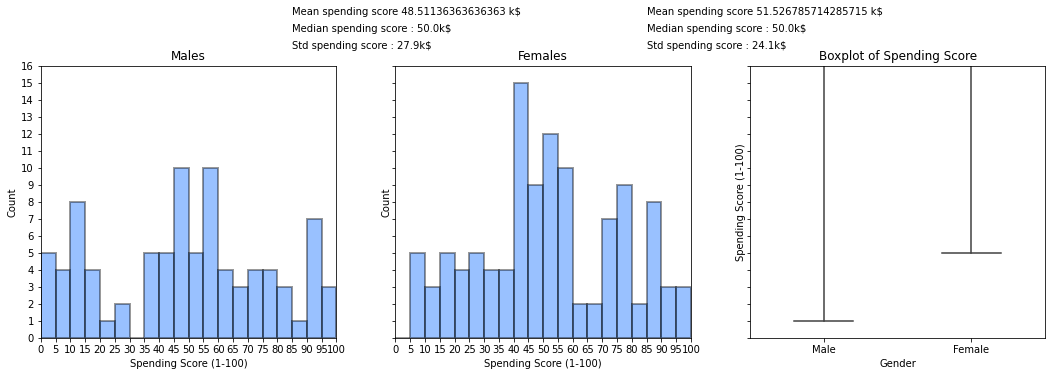

In [17]:
males_spending =  df[df['Gender']=='Male']['Spending Score (1-100)']
females_spending = df[df['Gender']=='Female']['Spending Score (1-100)']

spending_bins = range(0,105,5)
#males histogram
fig2,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5),sharey=True)
sns.distplot(males_spending,bins=spending_bins,kde=False,color='#0066ff',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))

ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85,19,"Mean spending score {} k$".format(males_spending.mean()))
ax1.text(85,18,"Median spending score : {:.1f}k$".format(males_spending.median()))
ax1.text(85,17,"Std spending score : {:.1f}k$".format(males_spending.std()))

#Females Histogram

sns.distplot(females_spending,bins=spending_bins,kde=False,color='#0066ff',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))

ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(85,19,"Mean spending score {} k$".format(females_spending.mean()))
ax2.text(85,18,"Median spending score : {:.1f}k$".format(females_spending.median()))
ax2.text(85,17,"Std spending score : {:.1f}k$".format(females_spending.std()))

#boxplot
sns.boxplot(x='Gender',y='Spending Score (1-100)' , data=df,ax=ax3)
ax3.set_title('Boxplot of Spending Score')
plt.show()

plt.show()

In [18]:
print('Kolgomorov test p value: {:.2f}'.format(stats.ks_2samp(males_spending,females_spending)[1]))

Kolgomorov test p value: 0.29


In [19]:
medians_by_age_group = df.groupby(["Gender",pd.cut(df['Age'],age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)

#Coorelation

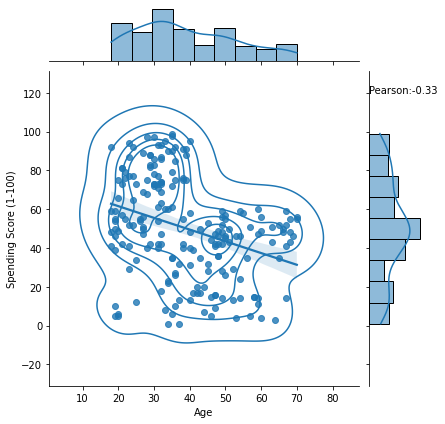

In [20]:
from scipy.stats import pearsonr

#calculate Pearson's coorelation
corr, _ = pearsonr(df['Age'],df['Spending Score (1-100)'])

jp = (sns.jointplot('Age','Spending Score (1-100)',data=df,kind='reg')).plot_joint(sns.kdeplot,zorder=0,n_levels=6)

plt.text(0,120,'Pearson:{:.2f}'.format(corr))
plt.show()

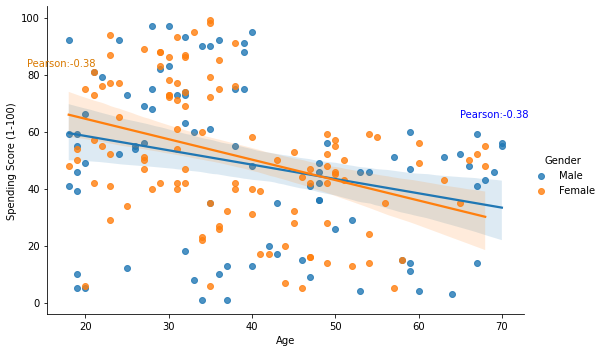

In [21]:
#Calculation Pearson coorelation

corr1, _ = pearsonr(female_age.values,females_spending.values)
corr2, _ = pearsonr(female_age.values,females_spending.values)

sns.lmplot('Age','Spending Score (1-100)',data=df,hue="Gender",aspect=1.5)
plt.text(65,65,'Pearson:{:.2f}'.format(corr1),color="blue")
plt.text(13,83,'Pearson:{:.2f}'.format(corr2),color="#d97900")

plt.show()

#Clustering Algorithms
#KMean
#DBSCAN
#MeanShift
#Agglomerative

In [22]:
from sklearn.cluster import KMeans

**for clustering only numeric columns are **used**

In [23]:
X_numeric = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

**In order to find appropriate number of clusters the elbow method will be used,in this method for this case the inertia for a number of clusters b/w 2 and 10 will be calculated

In [24]:
from sklearn.metrics import silhouette_score

***Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

In [28]:
n_clusters = [2,3,4,5,6,7,8,9,10] #number of clusters
clusters_inertia = [] #inertia of clusters
s_scores = [] #silhoute_score

for n in n_clusters:
  KM_est = KMeans(n_clusters=n, init="k-means++").fit(X_numeric)
  clusters_inertia.append(KM_est.inertia_) #data for the elbow method
  silhouette_avg = silhouette_score(X_numeric,KM_est.labels_)
  s_scores.append(silhouette_avg) #data for silhoute score method

**The below graph shows the inertia for selected range of clusters

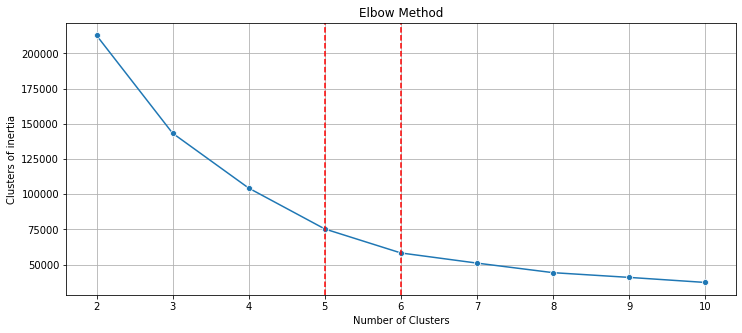

In [33]:
from IPython.core.pylabtools import figsize
fig,ax=plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters,clusters_inertia,marker='o',ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Clusters of inertia")
ax.axvline(5,ls='--',c="red")
ax.axvline(6,ls='--',c="red")
plt.grid()
plt.show()

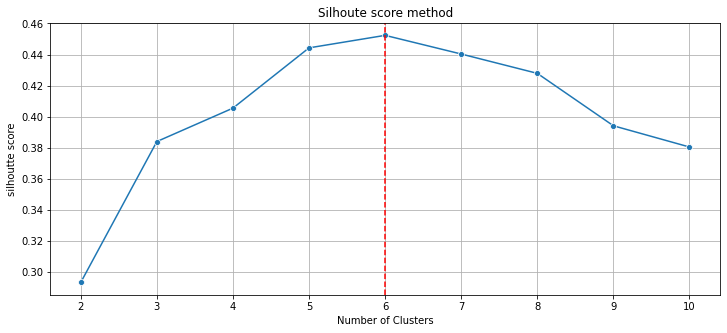

In [38]:
fig,ax=plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title("Silhoute score method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("silhoutte score")
ax.axvline(6,ls='--',c="red")
plt.grid()
plt.show()

In [ ]:
#Breaking scattered clusster in 5 group with respect to income and spending ex.high-low,low-high,med-med etc.
# KMS_clust_sizes = KMS_clustered

*KM MEAN 6 performs best in all algorithm bcz it are much stable clusters and balanced observation and DBSCAN are totally failed bcz clusters are scattered 
and samples are feww only 200 but DBSCAN works on big dataset